# 菜菜与菊安酱的sklearn实战案例课

# 03 基于集成算法融合模型的电商异常检测案例
## PART 1 业务与数据探索

本案例是针对中国某500强企业在2013年的部分电商交易数据进行的异常预测。该案例数据来源于某500强企业流出的非脱敏数据，最初在2018年时首次在Gitee被公开，是**货真价实来自企业、带有企业业务信息的现实数据**。这份数据披露了某500强企业在电商领域的战略部署、业务逻辑以及2013年全年完成的成绩，从中我们可以稍微复原电商战争兴起之时电商领域的竞争概况。对任意线上购物平台而言，平台的关键职责之一就是准确判断每笔订单背后的购买意图、并以此为依据保护买家权益，这有助于维护平台环境，有利于给买家、卖家带来更好的交易体验。因此，在交易完成之后迅速对交易进行异常检测（风险评估）是很重要的一环。在这个案例里，**我们将利用该电商平台在2013年内进行的部分交易数据进行建模，并实现对异常订单的识别检测**。

- 数据来源：中国某500强企业实际交易数据，数年后在Gitee上放出，用于学习交流用
- 数据量级：十万级
- 预测类型：分类型
- 涉及算法：随机森林，GBDT，XGBoost

## 案例目录

**一、电商的核心价值：更高的交易效率**<br><br>
**二、辨析电商交易模式：开放平台vs价值链整合**<br><br>
**三、淘宝vs京东：迥然不同的盈利逻辑**<br><br>
**四、订单异常检测：商家的帮手，平台的抓手**<br><br>
**五、数据探索：电商数据的基本预处理**<br>
- 1. 判断数据来源、理解电商数据特征与标签<br>
- 2. 缺失值处理：信息缺失与异常有关吗？<br>
- 3. 重复值处理：订单重复背后隐藏的问题<br>
- 4. 异常值：特征异常与交易异常有关吗？<br><br>


====以下内容见案例建模部分IPY====

**六：建模准备：复杂数据的特征工程与数据预处理**<br>
- 1. 粗略编码数据集，建立benchmark<br>
- 2. 交易数据的训练集测试集分割<br>
- 3. 异常交易vs普通订单：下单时间有区别吗？<br>
- 4. 支付方式：支付渠道的异常风险评估<br>
- 5. 城市：收货地点的风险评估<br>
- 6. 常规的离散型变量：商品类别&订单渠道&商品渠道<br>
- 7. 复杂的离散型变量：用户ID/商品ID/商品品牌<br>
- 8. 连续型变量：订单金额与销售数量分箱处理<br>

**七、模型构筑：从0实现电商订单异常检测**<br>
- 1. 导库、整合数据<br>
- 2. 特征工程在森林、GBDT与XGBoost上的效果<br>
- 3. 在森林、GBDT与XGBoost上的调参<br>
- 4. 使用Voting法则进行模型融合<br>

————————

## 电商的核心价值：更高的交易效率

电商是国民经济的重要产业之一，也是互联网时代下我们生活中关键的组成部分。**在2021年，全国大约有8.12亿人参与过线上购物，占网民总体的80.3%**。在电商用户中，许多人都可以轻松理解电商交易的具体流程，并对线上购物驾轻就熟，但我们却对于电商行业本身却知之甚少。即便作为互联网工作者/技术工作者，我们理解电商的关键在于“人货场”，却也很少能够触达电商行业本质与核心价值，比如：

- 为什么电商行业能够发展如此迅速呢？整个行业的核心价值在哪里？

- 假设电商平台提供的核心价值是“链接”（让买家能够买到线下买不到的产品），那为什么在提供同一价值的情况下，会有淘宝、京东、苏宁、唯品会等看起来高度相似的产品形态？

- 电商平台盈利吗？电商平台的收入从哪里来？

要回答这一系列问题，我们需要对电商的核心价值进行深入的剖析。

要理解电商，首先得理解**零售**。零售是一系列商业模式的统称。如果一种商业模式是通过某种交易结构，让消费者和商品之间产生链接、并最终实现成交，那这种商业模式就是零售的一种形态。

用阿里系的话来说，零售就是把最终付费的“人”（消费者）和“货”（商品）链接在一起的场。当这种场是实际存在的店铺时，零售发生在商场里，当这种场是线上构建的商城时，零售就成为了电商。毫无疑问的，电商平台的核心作用是链接供给侧与需求侧并促成交易，因此——

<center>——————————————————————————————————</center>

<font color=red><center>**电商本质上是一种零售方式。<br><br>零售的本质是把人和货链接在一起的场**。</center></font>

<center>——————————————————————————————————</center>

因此，几乎所有的电商分析都离不开“人货场”三要素，人货场本身就是零售业永恒的概念。

- **人** - 消费者以及与消费者行为相关的一切业务（如销售、转化、复购等）

- **货** - 商品和服务，包括提供商品的卖家、品牌及供应链

- **场** - 交易场所，包括交易场景、交易服务、交易结构等

现在问题来了，如果说电商本质就是一种零售的话，为什么线上电商会挤占线下零售的生存空间呢？在线上购物时，人们会损失线下购物时的体验、会对产品品质、商家信用等产生不信任，理论上来说，如果同样的商品可以在线下以同样的价格买到，人们就不会线上购物。但事实完全相反。**电商并不只是单纯地将交易的“场”搬到了线上，而是在“人货场”这三大零售要素中取得了比线下购物更高的交易效率**。

在我国独特的社会和经济条件下，在零售业中——

- 消费者总是渴望更快、更便捷地买到符合需求的好产品，因此会（无意识地）追求更高的交易效率

- 商家会有意识地追求更高的交易效率并且愿意为此付费，因为更高的效率会带来交易优势与利润

在整个行业的发展历程中，无论模式、商品、交易场景如何变化，**更高的效率都是整个电商行业的核心价值之一**。我们来看看具体是怎么回事：



<center>——————————————————————————————————</center>

<font color=red><center>**电商在“人货场”三大要素中的交易效率比线下购物更高。<br><br>消费者/商家总是在追求更高的交易效率，并且愿意为高效付费**。</center></font>

<center>——————————————————————————————————</center>

- **场的效率：信息流、资金流、物流**
> - <font color=green>**【优势】信息流**：消费者了解商品信息的成本越小，效率就越高</font><br>线下 - 腾出时间、找到相关门店、看商品、咨询门店工作人员、人力比价<br>线上 - 足不出户，信息触手可得，商品包罗万象、又多又全，还自动比价<br>**互联网提供的信息流异常高效**<br><br>
> - <font color=green>**【优势】资金流**：消费者付费方式越便捷，效率越高</font><br>线下 - 现金支付（专人收款、点清现金、退还零钱、检验真伪），刷卡支付<br>线上 - 扫码支付，无需找零、无需专人、无需验伪<br>**互联网的资金流便捷性很高**<br><br>
> - <font color=orange>**【----】物流**：商品越快到达消费者手中，效率越高</font><br>线下 - 近，即买即得，容易辨别真伪优劣，但货品范围有限、难以比价<br>线上 - 快，世界商品触手可得，价格也会被拉平，但质量参差不齐<br>**线下的“近”与线上的“快”形成了相似的效果**<br>

不难发现，线上交易在许多方面都具有效率优势，以往需要徒步一整天才能完成的工作，通过电商只需要点点手机就可以完成，交易效率大幅提升，对用户的吸引力极大，侧面降低了商家的获客成本。

- **人的效率：流量、转化、客单价、复购**
> - <font color=green>**【优势】流量**</font><br>线下 - 人流，将店铺开在人流量多、目标人群集中的地段可以吸引更多的人流<br>线上 - 流量，忽略距离、时间、地域等限制，上百种渠道触达比线下多数倍的用户<br>**互联网的流量优势会极力扩大每个店铺的潜在消费者**<br><br>
> - <font color=orange>**【----】转化**</font><br>线下 - 成交，依赖于线下销售人员、体验感进行成交<br>线上 - 转化，依赖于店铺宣传材料、商品评价、推荐系统、社群进行成交<br>**根据商品类别不同，线上线下成交/转化率会有巨大区别。在需要体验感、或金额巨大的交易中，线下更有优势。在需求明确、金额较小的交易中，线上更有优势。**<br><br>
> - <font color=orange>**【----】客单价**</font><br>线下 - 主要依赖于线下销售人员的业务水平<br>线上 - 推荐系统、满减优惠、提高连带率来增加客单价<br>**相同价格的产品在线上客单价会更有优势，因为用户对线上连带接受度更高。<br>但相同的产品在线上会有更低的价格。**<br><br>
> - <font color=green>**【优势】复购**</font><br>线下 - 回头客，必须先获取用户联系方式/或品牌已具备口碑，才能二次触达<br>线上 - 复购率，触达方式丰富（推送、私信、短信等），可大幅提高复购率<br>**在商品质量有保证的前提下，线上二次触达效率大幅领先**<br>

“人”的效率要素其实涉及到多方面、多因素的影响，因此不像“场”的效率要素那样容易比较。然而，线上的优势是显而易见的：
- 无论在与消费者相关的哪个交易环节上，电商都能使用多种方法提升其交易效率、甚至以很小的成本快速改变其转化或销售策略，因此**对商家的吸引力极高**。相对的，线下环境中的则没有这么多选择、也没有这么灵活——一家线下店不太可能在短时间内随人流的移动而改变地址，但线上店则可以在任何流量聚集的地方进行交易。

- 除此之外，线上的每个环节都能够捕获到精准的数字，但线下却很难精确监控“人”相关的一系列数据，因此线下可以优化的程度就更小。

从各个角度来说，电商在“人”相关的效率点上都是更有优势的。

- **货的效率：定倍率**

定倍率是商业世界最基础的逻辑之一，它衡量一个产品/一种服务从产出到售出过程中的效率。

 **<center>定倍率 = 商品零售价/商品成本</center>** 

100元成本的商品卖500元，则该商品的定倍率是5。定倍率越高，则说明商品从产出到售出之间的效率越低。为什么定倍率可以衡量产出到售出过程中的效率呢？我们先来看看从商品产出到售出需要经手多少流程：

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/case3/03.png)

一个产品被设计(D)出来，交友制造商进行制造(M)，再通过供应链进入大小商家或线上平台(B,b,P)的货架，最终被卖给消费者(C)。在这个流程中，制造、供应商、平台、商家都需要赚取利润，因此每经手一轮，就会多一个“中间商”赚差价，也就多了交易成本。对商家而言，交易成本就是商品被送到消费者手中的成本，该成本越高，商品的价格也就必须相应地越高，定倍率也会高，商品的市场竞争力就会越弱。**如果能够缩短/改善商品交换的流程，就能够提升货的效率，从而降低商品价格，获得更高的市场竞争力**。

在传统线下的B2C(b2C)模式中，小型店铺或大型店铺直接面向消费者售卖产品，因此店铺需要支付的租金、仓储、水电费等基础费用都会被包括在产品价格中。除此之外，有许多小型店铺没有单独的线下店，他们是在大型商场或超市中占据一个门面，此时的模式是b2B2c，用户付出的价格会更贵，定倍率更高。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/case3/02.png)

线下模式类比到线上，会出现两个明显的不同：
- 在线上，小型商家大多无法直接接触到消费者，因此很少有不借助平台实现的b2C

- 在借助平台的模式中，供应商先给小型商家供货，小型商家再将商品上架到平台，形成b2P2C模式（这也是当前电商领域最普遍的模式，由于平台的存在实在是太理所当然了，因此我们常常把这种模式也称之为b2C）。在这种模式下，上线平台本身是免费的（相当于中间商“平台”并没有赚差价），线上装饰店铺、制作宣传图像的成本与线下店铺租金比起来完全不值一提，货品成列的成本可以大幅度被消减。同时，由于商家的成本变低、上线后竞争环境更加透明、商品价格也随之降低，将大幅降低定倍率。

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/case3/01.png)

**<font color=green>【优势】天然的，大部分商品/服务的线上定倍率是低于线下的</font>**，这说明电商在“货”领域的效率常常能够更高。这是为什么我们在美团团购时总能拿到比门店更低的价格，也是“网购”看起来总是比线下更加便宜的核心原因。在这一前提下，巨头们还纷纷执行缩减更多流程的M2B模式、M2C模式、C2M模式，再结合“新零售”概念中的线上结合线下模式，电商行业中“货的效率”还在继续提升。

不难发现，电商在“人货场”三大要素中的交易效率比线下购物高很多，毫无疑问**更高的效率是电商行业的核心价值**之一。毫不夸张地说，正是**线上信息流天然的效率优势** + **中国飞速增长的国民购买力**催生了最初的C2C、B2C电商。2005年后**国家基础设施建设的飞速发展** + **本土电商企业持续提升各环节交易效率**，让电商行业生机蓬勃、机遇不断。毫无疑问，电商是为效率而生，也因效率才壮大的。

————————

## 辨析电商交易模式：开放平台vs价值链整合

电商的核心价值就是更高的交易效率。正是因为高于线下购物的效率优势，电商才得以蓬勃发展、成为国民经济的支柱产业之一。但电商的发展并非一蹴而就，这一行业并不是天生就带有各方面难以战胜的效率优势，相反，**电商在1990年代初生时，不仅在人和货的效率上存在巨大问题，在场的效率方面更是处于绝对劣势的**。在过去的三十年中，中国本土电商平台创意不断、艰难探索、持续提升各环节的交易效率、克服了一个个效率上的难题，才成就了今日全球最大规模的电商市场。

特别的，本土电商的两大巨头淘宝和京东，在发展历程中从从不同的角度提升了不同的交易效率，从而形成了不同的模式，我们来看看——

- **淘宝：打造电商效率优势的根基**

回到2003年，中国的电子商务市场还是一片混沌，除了遭受全球互联网危机的牵连之外，互联网配套的基础设施、以及民众对于电子商务的认知都严重不足。那时候电商唯一的优势，就是**信息流**：商家和用户可以跨越千里进行交易，人们终于不受地域限制进行购物了。但在其他方面的劣势，会让信息流上天然的优势变得不再重要。比如说——

**场的效率：资金流**

> - **<font color=orange>【劣势】最初的线上支付方式是带身份证去银行转账、去邮局汇款，是一件很重大的事儿</font>**<br><br>
> - **<font color=orange>【劣势】必须开通网上银行，人们对网银的安全问题十分担忧</font>**<br><br>
> - **<font color=orange>【劣势】无法“一手交钱一手交货”，用户和商家对彼此有强烈的“不信任感”</font>**<br>

为此，**<font color=green>支付宝</font>**及平台配套的信任体系被发明出来，成为了影响当代互联网发展的关键产品之一。在淘宝的体系中，支付宝有以下四大优势：

> - 作为淘宝收款的第三方工具，在商品邮递期间暂时保管款项，只有消费者收到货并且满意后商家才能够拿到钱，搭配**<font color=green>用户14天自动收货</font>**、**<font color=green>无物流信息课申请退款</font>**等功能，完美解决商家和用户之间的信任问题<br><br>
> - 接入各大银行系统，无需再登录网银/银行转账/邮局汇款，**<font color=green>可直接在PC端使用密码支付</font>**<br>为进一步提升资金流效率，密码支付进化为**<font color=green>扫码支付</font>**<br><br>
> - 有了信任，淘宝得以拉长现金流的时间差，反哺支付宝相关的金融业务<br><br>
> - 作为支付工具自带的流量在提升支付效率的同时，也提升了流量的效率<br>

得益于支付宝的出现，线上资金流效率大幅提升，甚至在线下也几乎替代了现金支付（从支付工具的角度来看，支付宝可是微信的大前辈了）。

**货的效率：定倍率**

> - **<font color=orange>【劣势】受海外成熟电商体系影响，本土电商平台刚诞生时都是采取收费制，商家入驻平台、发布商品都需要缴费，成交金额还需要按比例上交平台，这是因为b2P2C过程中平台(P)需要盈利</font>**

新世纪之初，国内最大的电商平台是美资eBay控制的易趣。易趣在全球都使用以上的方式、作为中间平台赚取差价。淘宝在2003年成立，刚一诞生就与易趣开始了长达3年的“商家争夺战”，淘宝为争取更多商家入驻平台，宣布执行“**<font color=green>平台费用全免</font>**”政策，马云甚至严令淘宝在3年内不许盈利、只争商家和用户。全免政策在当时引起了巨大的轰动，并最终成为淘宝战胜易趣、独霸国内电商市场的关键因素。

淘宝的全免政策就是线上b2C模式的雏形，**虽然平台(P)处于小型商家(b)与消费者(C)之间，但商家可以选择不支付额外的费用**，这就吸引了众多商家入驻。同时，在平台上陈列商品并不占据物理空间，因此不需要支付店铺租金，可以极大地降低商家的成本。由于**商家的成本变低，商品价格也随之降低**，消费者接踵而来。如此，淘宝通过全免政策，在短期之内形成了对商家、对用户都更有吸引力的格局。淘宝战胜易趣之后，几乎没有本土电商再按“入场费”方式对商家进行收费了，电商的盈利模式也发生了巨大的改变。

**不难发现，淘宝的方式几乎奠定了整个中国电商模式的基础**，在许多具体的产品设计、产品逻辑上，京东、国美、苏宁、唯品会等知名电商平台都大规模接入或参考了淘宝的交易系统。从03年建立、06年击退美资易趣、成为本土霸主、08年实现盈利的历程来看，阿里巴巴毫无疑问是一家了不起的互联网公司。

<center>——————————————————————————————————</center>

<font color=red><center>**支付宝作用于资金流效率，全免政策降低了定倍率<br><br>结合互联网天然的信息流优势，淘宝形成了交易基本流畅的开放平台模式（C2C/b2C）**</center></font>

<center>——————————————————————————————————</center>

- **京东：站在巨人的肩膀上，解决巨人的问题**

淘宝虽然为本土电商平台进行了基本的打样，但还是有许多难以克服的效率问题存在。例如——

**场的效率：信息流**

> - **<font color=orange>【劣势】商家与消费者之间存在信息差，假冒伪劣商品横行，商品质量堪忧</font>**<br><br>
> - **<font color=orange>【劣势】线上购物缺失“体验感”，无法获得尺寸、颜色、版型等直观信息，掉坑几率较大</font>**

**场的效率：物流**
> - **<font color=orange>【劣势】平邮邮寄到货时间14天，快递邮寄3-7天</font>**<br><br>
> - **<font color=orange>【劣势】快递服务质量不高，价格昂贵</font>**<br>

存在信息差、缺乏体验感是电商天生的缺陷，这种情况降低了信息传递效率，削弱了消费者的实际利益，是假冒伪劣商品的温床。同时，又昂贵又慢的物流进一步增加了消费者下单时的心理障碍。在中国本土经济和社会条件下，任意环节上严重的低效都可能演变成巨大的问题——

**信息流和物流上的劣势导致——**
> - **<font color=orange>【劣势】用户对网络购物缺乏信任，电商一时成为低质、假货的代表</font>**<br><br>
> - **<font color=orange>【劣势】整体环境不支持大件/精品件/特殊件交易，许多日常需求难以被满足</font>**<br><br>
> - **<font color=orange>【劣势】低质小件的客单价难以突破，快递费看起来异常昂贵</font>**<br><br>
> - **<font color=orange>【劣势】售后服务参差不齐，退货难，退货邮费有时候比商品还贵</font>**<br><br>
> - **<font color=orange>更多复杂的用户心理……</font>**

对任何以C2C（b2C）为主流交易方式的电商平台而言，以上问题都会存在，哪怕是亚马逊也不能免俗。由于商品由商家提供，平台本身难以控制商品质量，因此亚马逊、淘宝都尝试使用一套增强用户体验、增加用户反馈机制的系统来缓解相关的问题。例如，**用户评价系统、商家评分系统、按评价/评分的排序来确定商家在搜索引擎中的权重、与快递公司合作、给与邮费补贴**等。但道高一尺、魔高一丈，面对疯狂刷单、索要好评等行为，系统只能隔靴搔痒，无法解决根本问题。

2004年6月，京东在自己的3C光碟业务蒸蒸日上的时候，决定全面放弃线下、进军电商。在数年的探索中，京东依赖于自身的基因，以电商模式中存在的问题为突破口，进行了多种模式创新，并取得了斐然的成就——

- **<font color=green>京东自营：变C2C为P2C/B2C，平台升级为一个“大商家”，亲自把控进货渠道和商品质量</font>**<br><br>
在传统平台上，商品由商家提供，平台要通过商家控制商品质量成本高、难度大、效果差。京东一改大部分平台“先吸引商家，再用商家吸引用户”的循环，直接与工厂/品牌/高品质商家对接，筛选出高质量商品售卖给用户。**这种模式在京东成立初期就在采用，后来才被命名为“京东自营”**。这个方法有一石多鸟的效果——<br><br>
    - 对完全自营商品，将b2P2C流程缩减为P2C，降低定倍率，无需抽成即可获得商品售卖的收入<br><br>
    - 对半自营商品，引入知名商家的品牌为自己站台，扩大平台影响力<br><br>
    - 平台得以亲自把控商品质量和供应链的一部分，平均商品质量大幅提升<br><br>
    - 平台小商家(b)为与自营店铺竞争，会主动提升商品质量<br><br>
    - 大件/精品件交易成为可能，客单价大幅提升<br>

- **<font color=green>京东仓储&京东物流：免邮+半日达，京东物流效率直逼线下购物</font>**<br><br>
作为一个“大商家”，京东决定亲自把握了供应链（进货、储存、配送）的一部分。自2007年起，京东开始在全国建立自己的仓储中心用于存货，并针对这些仓库的位置提供京东配送/合作配送服务，此举当时在国内引起了巨大的震动，行业对此非常不看好，但京东还是力排众议走上了发展物流和仓储的道路，今天京东的物流效率已是全球前列。通过将物流规范化、工业化，京东在物流上的效率得以全面提升：<br><br>
    - 免邮利益让渡给用户，自营店免邮，半自营店/非自营店满99免邮，用户的心理成本大幅降低<br><br>
    - 几乎形成了“全场免邮”噱头，平台竞争力大幅提升<br><br>
    - 京津冀、长三角、成渝等数十个主要城市实现“半日达”，“次日达”城市覆盖率也接近95%<br><br>
    - 售后服务+退货系统全面升级，提供上门取件/免退费等服务，大幅降低体验感缺失带来的心理损失<br>

在淘宝的基础上，京东的模式增加了商品质量高、服务质量高、物流费用低、物流速度快这四大优势，这些优势很快就帮助京东占据了一块市场，让京东成为用户心中和淘宝功能不同、印象不同的电商平台。

<center>——————————————————————————————————</center>

<font color=red><center>**自营政策提升产品质量与客单价，自建物流系统大幅提升了物流效率<br><br>结合淘宝打下的支付/交易系统根基，京东建立起了效率远高于线下的价值链整合模式（P2C/B2C）**</center></font>

<center>——————————————————————————————————</center>

不难发现，京东与淘宝在不同的效率上分别取得了重大突破，几乎已经将所有线上的效率劣势转化为了效率优势，这才得以在2015年前稳坐本土电商的前两把交椅。两个企业在竞争市场份额的同时，也会模仿对方的方式来提升自身平台上的效率，但往往很难颠覆从0到1时创造出的辉煌成果。例如——

- **京东金融**：其声势在支付宝与微信两个支付巨头的斗争中显得微不足道。大部分用户只知道京东白条、金条，对金东金融的其他业务不熟悉也不关心。

- **天猫商城**与**菜鸟网络**：天猫商城解决淘宝低质问题，通过平台为高品质商家/商品背书的方式引入品牌商家。菜鸟网络包括菜鸟裹裹、菜鸟驿站等5大品牌，提供次日达、上门取件、包邮免邮等服务，主要用于提升淘宝/天猫的物流效率。但京东“正品保证”、“次日达”的名声已经太深入人心，大部分用户根本不熟悉菜鸟裹裹，也无法辨别天猫商城与淘宝有什么区别。

可见，虽然可以将他人从0到1的模式复制或借鉴过来，但品牌的影响力并不能在一朝一夕之间建立。

————————   

## 淘宝vs京东：迥然不同的盈利逻辑

淘宝和京东有着表面相似、但实际完全不同的商业模式，在不同商业模式下，两大巨头的盈利模式、盈利状态自然也有巨大的差异。平台的盈利模式、以及是否能够盈利本身很大程度上取决于平台在整个交易关系中的地位，我们来看看——

![](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/micro_class/sklearncase/case3/01.png)

在电商的交易环境中，存在三个关键的角色：消费者，商家与平台。三个关键角色的目标不尽相同，甚至有些矛盾：

- 消费者的目标：以尽量低的金钱/时间成本满足对物品/服务的需求

- 商家的目标：以尽量高的利润（低成本高价格）出售尽量多的商品

- 平台的目标：帮助商家和消费者达成目标，并在交易中找出盈利模式

不难发现，消费者渴望的“低价”与商家渴望的“高价”相矛盾，平台渴望从商家/消费者处收费，但商家/消费者都渴望尽量低的成本。因此，消费者、商家、平台三大角色之间是存在制衡与博弈关系的。在这个博弈关系中，占据主导地位就能获得最大的利益，相反，就要被其他角色裹挟着付出更高的成本。**从企业的角度来看，电商平台要盈利，就必须在三方博弈中占据主导地位**。那谁是最有话语权的角色呢？在不同的商业模式中，话语权属于不同的角色，我们来看看——

<center>——————————————————————————————————</center>

<font color=red><center>**淘宝开放平台模式中，平台最有话语权<br><br>京东价值链整合模式中，用户最有话语权**</center></font>

<center>——————————————————————————————————</center>

- **淘宝：平台>用户>>>>商家**

在b2C/C2C模式中，平台相当于中介，实际的交易发生在商家和消费者之间。在这个过程中，几乎所有线上的效率优势（信息、支付、物流、转化、定倍率）都是来自于平台提供的功能和服务，因此**商家想要享受电商行业的红利、想要从线上更高的交易效率中获益，就必须与平台合作**。

以当今本土电商的环境来看，**大部分个人商家(C)或小型商家(b)更换平台的成本很高**，京东、国美、苏宁、亚马逊等商城对商家入驻条件较为苛刻，唯品会、Shopee、毒等商城对商品品类有严格要求，拼多多是C2B模式无法轻易入驻、闲鱼没流量，大部分的小型商家只能在淘宝上求生存。因此商家在平台面前是较为弱势的，商家必须顺从平台的规则才能进行交易，能做出的最大反抗也就是退出淘宝、不再做电商。

同时，商家又面临需要从消费者处获取现金、需要赢合消费者需求的状况。对于消费者来说，切换到淘宝上另一个店铺、或者切换到其他平台进行购物，都是轻而易举、几乎没有成本的行为。所以**商家一面要顺从平台的规则、承担平台的成本，一面要哄住用户**，是淘宝的模式中话语权最弱的角色。

**淘宝的文化本身是“重用户”多过“重商家”**。商家可能是吸引用户的关键，但用户才是具有真正消费需求的对象。淘宝相信，要让解决方案跟着需求走（商家来找用户），而不是让需求自己来找解决方案（用户去找商家）。在很长一段时间内，淘宝都专注于提升用户粘性，设计了众多的功能让用户在APP中逛逛逛（这也是为什么内容电商、直播电商会从淘系先开始的根本原因）。在这种文化熏陶下，淘宝上商家就更加弱势了。

**商家的弱势、平台的强势构成了淘宝这样C2C/b2C平台能够盈利的关键点**。帮助商家提升“人”的效率、享受“场”的效率是淘宝的主要收入来源：<br>

- **<font color=green>【核心收入来源】广告竞价服务</font>**：帮助商家获取流量。在互联网“信息流”优势下，用户只需搜索关键字便可轻易获得品质相似、价格相似的数以万计的商品信息，商家想要在如此多的信息中脱颖而出，就必须购买淘宝提供的广告竞价服务。
> - **直通车**：关键词竞价，用户搜索关键词时，对该关键词出价越高的卖家越优先出现
> - **钻石展位**：在首页/搜索页等页面放置展位，商家可以设置图片广告吸引点击
> - **聚划算**：付费参与活动，拿到“热卖标”、提升关键词排名、配合平台大促一起爆发

- **<font color=green>卖家店铺页面/商品页面设计</font>**：帮助商家提升转化。淘宝提供专业创作团队设计的店铺和商品界面模板，提供专业技术团队开发的拓展服务（如直播带货），这些模板和服务需要付费使用。<br>

- **<font color=green>商家店铺抽成(佣金)及加盟保证金</font>**：按照销售额对店铺抽成，保证金无利息且永不退还（除非关店）
> - **天猫商家**：销售额抽成5.5%，保证金5w-15w+平台年费6w元
> - **淘宝个体户**：销售额不抽成，保证金1000+旺铺使用费<br>

- **<font color=orange>支付宝相关收入</font>**：平台使用支付宝所产生的相关收入，严格来说不算淘宝、而算是支付宝的收入。
> - 商家收款时需要支付通道使用费，和第三方支付手段相似，收取一定百分比的手续费
> - 消费者付款与商家收款之间有较大时间差，支付宝可在短时间内囤积大量现金流，利用现金流对外借贷或投资、实现金融方面大规模盈利
> - 收取的店铺保证金也可以作为现金流的部分，对外借贷或投资实现盈利

你发现了吗？**几乎所有的收入都是对商家进行的收费**，这与我们之前分析的、商家在平台模式中处于绝对弱势地位有很强的联系。参考淘宝的模式，几乎所有开放平台电商的盈利值得一提的是，淘宝还提供淘宝大学提供电子商务在线培训服务，卖家可以付费接受培训，学习如何借助淘宝的一系列工具将店铺交易额带飞，相当于让商家付费学习如何更好地为淘宝付费（当然了，也是学习如何更好地为自己赚钱）。

- **京东：用户>平台≈商家**

在P2C/B2C模式中，京东本身就是一个非常大的商城（相比自营店，京东平台上的入驻商家并不是很多）。因此不同于淘宝模式中“平台创造效率、商家哄住用户”的环境，**京东要自己创造效率优势，还要自己哄住用户**。虽然京东的产品质量和服务效率能够极大程度地把握住用户，但在其他电商平台也在飞速发展的前提下，用户跳转到其他平台进行购物的成本还是相对较小，因此用户在京东的模式中话语权要强过平台。

面对这种情况，京东不得不付出较多的成本来提升服务质量和产品质量，深入培养用户对品牌的忠诚，增强用户粘性。京东上的商家虽然也依赖于平台创造的效率完成交易、也要分担平台的成本，但由于京东自己作为“大商家”有较多销售额，因此不会在商家价值上榨取得那么深入（或许他们应该榨取得更深入），因此商家在京东的环境中话语权不是太弱。但如果京东想要加强对商家价值的挖掘，那商家也会变成整个平台上最弱势的存在。在这种环境下，京东的主要收入来源有：

- **<font color=green>【核心收入来源】自营商品的销售额</font>**：京东通过从供应商、采购商进货，在自身平台上交易，争取差价、覆盖自身成本来创造利润。为扩大自身影响力，京东在很长一段时间内都采取薄利多销方式增加用户粘性，近年来京东价格逐渐回升，利润空间逐渐变大。

- **<font color=green>【核心收入来源】与淘宝相似的广告竞价服务、流量推广服务</font>**：主要是焦点图售卖、站内付费推广、站内团购机会等。除了向商家开放，京东的流量推广服务还向其他门户网站、线下商店、线下活动开放，更倾向于通用广告。通用广告曾一度成为京东核心的收入来源之一。

- **<font color=green>店铺抽成及加盟保证金</font>**：京东店铺几乎只接受企业入驻，且必须是自带影响力的品牌。入驻京东一般需要支付3w-10w之间的保证金，平台年费6000-1w2，以及3-10%的交易佣金。考虑到这些店铺都是自带影响力和流量的品牌，低保证金、高交易佣金是合理的选择。

- **<font color=orange>京东金融相关收入</font>**：与支付宝类似，卖家提现需支付手续费，另外京东依赖白条、以及京东金融的现金代管服务争取到消费者付费与商家收款之间的时间差，可以产生外贷和投资收益。

可以看到，**京东同时从用户和商家处获得收入**，整体的盈利策略会更温和，消费者和商家的利益都一定程度上得到了保障，是一种多方共赢的局面。在京东文化熏陶下，京东对于员工的薪资也从不吝啬，这一切看起来非常和谐且多元化的收入却不能让京东成为国内电商霸主。

<center>——————————————————————————————————</center>

<font color=red><center>**在开放平台模式下，阿里巴巴可以获得利润以及市值<br><br>在价值链整合模式中，京东可以获得营收与现金**</center></font>

<center>——————————————————————————————————</center>

仁不带兵，义不行贾，对用户和商家过于温和的电商平台自然无法在盈利上有很好的保障。我们可以对比一下阿里巴巴与京东在过去三年的年营业收入、盈利以及利润率：

> - 年营收

| |京东|阿里巴巴|
|---|---|---|
|2018|4620亿|3452亿|
|2019|5769亿|3594亿|
|2020|7458亿|5097亿|

根据数据统计，京东2020年活跃用户大约是淘宝活跃用户的1/3，然而：
- 京东的用户消费力更强、客单价更高
- 京东的商品价格更贵，用户在京东平台容易接受更高的价格
- 京东P2C/B2C业务可以直接从售卖商品获得收入、京东对商家的佣金也普遍高于阿里巴巴

因此京东的年营收是持续高于阿里巴巴的，这与京东的模式一脉相承。同时，由于京东可以直接从商品售卖业务中获得收入，因此京东有固定的现金流收入，其一直很健康，以至于让股东们对亏损忍耐了多年。在2018、2019年时，互联网上充斥着关于“为什么京东一直在亏损，而刘强东夫妇还如此富有”、“京东是世界上最有钱的亏损公司”的讨论，这都是京东在现金流占据优势引发的话题。

> - 年盈利

| |京东|阿里巴巴|
|---|---|---|
|2018|亏损25亿|614.12亿|
|2019|121亿|934亿|
|2020|494.05亿|1404亿|

> - 利润率

| |京东|阿里巴巴|
|---|---|---|
|2018|-0.54%|17.79%|
|2019|2.10%|25.99%|
|2020|6.62%|27.55%|

然而利润上，阿里巴巴就全面占优了，其理由也很容易理解：
- 在淘宝的模式中，营业成本主要集中在为商家提供服务、维持平台稳定这些方面，实际服务用户、给用户让利、与用户博弈的都是商家，因此淘宝在实际交易中承担的成本较低。<br><br>
- 在价值链整合模式中，京东为了保障好的服务和体验，必须对仓储、物流、售后服务等环节付出高昂的成本，包括各环节的人力、基础设施、管理、服务，而且京东还必须注意这些成本不能过多地转移到商品价格上，否则会极大程度影响平台在用户心中的竞争力。

不难看出，不同的商业模式会反馈到企业的财务状况中，看似很赚钱的淘宝其实不从用户处赚钱、质量很高的京东也不能理所当然地争取到更多的用户。淘宝与京东的比拼为我们展示了藏在“人货场”分析框架背后复杂且深入的电商业务逻辑，也为我们后续深入理解其他电商平台有巨大的帮助。

- **纵横三十年：本土电商行业的风云变幻**<br><br>
    - **90s - 2003：萌芽阶段遭遇剧变**<br>
>    上世纪90年代，互联网交易破土萌芽，网络零售开始起步<br>
>    1999年，国内首家C2C电商8488正式成立，**同年易趣网、当当网成立**<br>
>    首批本土电商平台如雨后春笋般冒出，开始进入市场<br>
>    2000-2003年，互联网泡沫破灭，全球互联网业务遭受重创<br>
>    海外巨头趁机抢占市场，大批电商平台速生速死<br>**8488没落，eBay收购易趣，亚马逊入驻中国**，首批本土电商几乎全灭<br>
    - **2003 - 2007：外资水土不服，本土企业艰难探索**<br>
>    2002年底非典爆发，随即**淘宝网成立，一年后京东进军电商领域**<br>
>    自诞生起，淘宝与易趣展开了长达2年半的流量战争<br>**放弃盈利、只争用户**的免费策略+**支付宝**为淘宝带来了最终的胜利<br>
>    彼时电商盈利模式尚不明确<br>
    - **2008 - 2014：巨头竞争格局初显，中国电商行业爆发式增长**<br>
>    2008年我国成为全球网民最多的国家，2009年网购人数突破1亿<br>
>    **物流行业**飞速发展，奥运为国家基础设施建设格局带来改变<br>
>    电商巨头逐渐摸索出各自的盈利模式，**双11活动**正式诞生<br>
>    **线下零售业受到严峻挑战**<br>
>    传统线下巨头开始发展线上业务，苏宁、国美开始发起激烈价格战<br>
>    2014年底，中国电商交易体量已全面超越欧盟、日本<br>
    - **2015 - 2017：互联网流量危机爆发，电商市场由蓝海变红海**<br>
>    流量成本疯狂增长，店铺增速远高于新用户增速<br>
>    竞争逐渐结束，淘宝京东坐稳行业头名，行业整体增长速度放缓<br>
>    有流量即有收入的蛮荒时代过去，巨头开始**重用推荐系统**与"猜你喜欢"<br>
>    大批个人商家难以盈利，退出市场<br>
    - **2018至今：电商新模式遍地开花，即将迎来更多新变化**<br>
>    **拼多多**杀入市场，“百亿补贴”又一次引发电商行业的流量大战<br>
>    短视频迅速崛起，**抖音/快手**入场电商，直播电商成时代宠儿<br>
>    电商垂直领域快速发展，社交电商、内容电商、跨境电商成新风口<br>

————————

## 订单异常检测：平台的抓手，商家的帮手

在分析电商业务逻辑的过程中，我们已经发现平台、商家、用户的利益诉求并不相同，并且三种角色存在着利益上的博弈关系。从宏观的角度来说，平台/用户可以利用在博弈关系中取得的优势达成自己的目的、商家并无太多反抗之力，但从微观的角度来看，每个商家、每个用户都可能做出扩大自己的利益的行为。

在千万商品、过亿用户的电商平台上，商家和用户的某些行为可能严重破坏平台环境、拉低线上交易效率，因此平台必须要对违规行为进行管控。幸运的是，无论商家和用户采用何种行为令自己获利，最终这些行为都会体现在交易信息上，因此**平台管控商家/用户异常行为的工具就是——订单异常检测系统**。

在不了解电商业务的状况下，大部分人很难理解订单究竟为什么会“异常”。在复杂的电商业务状况下，大量情况都可能是异常订单——

- **A类：明显违背平台效率追求、不遵守平台规则、阻碍正常交易的订单**
> - 商家大量刷单（阻碍信息流效率）
> - 虚假宣传，被多次投诉/差评的商品相关的订单（阻碍信息流效率）
> - 付款后不发货、多次无视用户发货请求的订单（阻碍物流效率）
> - 显示发货、但实际并不发出货品、拖延至确认收货日期的订单（阻碍物流效率）

这类订单基本都是商家主动发起，平台会对商家行为进行监控，若多次发现该类异常订单则可能降低商家的权重、实施惩罚，从而影响商家在搜索引擎中的排名，进而严重影响流量。

- **B类：恶意的、滥用买家权益、非真实购买意愿的订单**
> - 因商家之间的纠纷（盗图、知识产权）被报复拍下
> - 因用户与商家的纠纷被报复拍下
> - 同行出于攻击/刷差评目的拍下
> - 锁单后一直不付款
> - 付款后立即退款、刚发货立即退款
> - 满减凑单后申请部分退款
> - 打假订单、以广告法、食品法、版权为由的敲诈订单
> - 退货后发现货品被调包、或退回商品件数与实际下单数量不符

这类订单基本都是商家对其他商家、或用户发起。平台若检测到该类订单，会对发起恶意攻击的用户或商家进行降权，用户会被限制参与某些满减或营销活动，重者可能面临封号风险。这类检测可以保护商家不受恶意用户和商家侵扰。

- **C类：物流/交易过程中出现问题，无法完成正常交易流程**
> - 平台标记有恶意购物嫌疑的顾客下单，不能走正常发货流程
> - 设错价格/设错优惠被大量拍下，库存不足，不能走正常发货流程
> - 物流单号被重复使用
> - 发货商品无走件记录、货物丢失
> - 发货商品因物流过程损坏
> - 退货物流无走件记录、货物丢失
> - 退回商品与退货订单商品不一致
> - 退货物流地址有误、非店铺退货地址
> - 用户提出超出正常售后范围的诉求（不接受退款、换货），不能走正常售后流程

这类订单是正常交易流程中出现的意外状况，需要平台出面作为第三方进行裁决，由商家/用户分担责任，解决纠纷。

另外还可能存在：

- **明显违背国家法律法规、违反道德约束的订单**
> - 违法违禁物品/内容的传播
> - VPN的售卖
> - 珍惜动物售卖、宠物盲盒等

该类订单一旦被平台检测到，会立刻被下架并给与警告，多次无视警告则直接封号处理，商家还可能承担相应法律责任。

对电商平台而言，每日检测异常订单能够维护平台交易环境，保护商家和用户处于相对公平的竞争环境中。对商家而言，异常订单检测系统能够快速筛选出非真实购买意愿、以及无法正常完成交易流程的订单，提升订单的处理效率。当然了，**鉴于电商“交易”的自然属性，在明确阻碍交易流程的事件发生之前，即便订单被系统认为是异常，商家可能也不会主动叫停交易**。因此异常检测系统更多是监督商家和用户行为、并针对高风险订单预警。

## 数据探索：电商订单数据的基本预处理

### 1. 判断数据来源、理解电商数据特征与标签

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['Simhei'] #让jupyter中的图画上的中文都显示出来
plt.rcParams['axes.unicode_minus']=False

In [3]:
data = pd.read_csv(r"H:\精品课\sklearn实战案例\数据\电商异常检测\abnormal_orders.txt")

In [4]:
data.head() #查看数据的大致内容

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


In [5]:
data.columns

Index(['order_id', 'order_date', 'order_time', 'cat', 'attribution', 'pro_id',
       'pro_brand', 'total_money', 'total_quantity', 'order_source',
       'pay_type', 'user_id', 'city', 'abnormal_label'],
      dtype='object')

#### 查看样本数/特征数

In [6]:
data.shape

(134190, 14)

#### 更换列名为中文

In [7]:
data.columns = ["订单ID","下单日期","下单时间","商品一级类别","商品所属渠道","商品ID","品牌","订单金额","商品销售数量","订单渠道","支付方式","下单用户ID","城市","异常"]

In [8]:
data.columns.tolist()

['订单ID',
 '下单日期',
 '下单时间',
 '商品一级类别',
 '商品所属渠道',
 '商品ID',
 '品牌',
 '订单金额',
 '商品销售数量',
 '订单渠道',
 '支付方式',
 '下单用户ID',
 '城市',
 '异常']

In [9]:
data.head(5)

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


- 标签探索

In [10]:
(data["异常"] == 1).sum()

28457

In [11]:
(data["异常"] == 1).sum()/data.shape[0] #样本不均衡，但是不均衡的程度较轻

0.2120649824875177

虽然标签定义被定义为交易异常，但我们其实并不了解这里“异常”的具体含义。在实际业务工作中，我们将询问业务人员“异常”的定义，但现在我们无法得知其真实情况。如果可能的画，我们将在数据探索过程重努力挖掘交易异常的真实定义，力求获得更加深入的业务理解。

- 下单时间

In [12]:
data["下单日期"].value_counts()

2013-10-31    690
2013-03-21    429
2013-11-01    426
2013-01-24    422
2013-03-23    416
             ... 
2013-07-31     17
2013-08-31     14
2013-05-31      2
2013-03-31      2
2013-01-31      2
Name: 下单日期, Length: 364, dtype: int64

有364个类别，初步判断应该是覆盖2013年中每一天。如果是较大的电商平台，不太可能出现一天之内圈平台只有2单交易的情况，因此判断该数据应该是全年交易数据的抽样数据。

- 订单ID：订单号码

In [13]:
#订单数据的ID一般不会有重复值，我们先确认一下ID是否是唯一ID
data["订单ID"].duplicated().sum()

19212

订单ID存在重复值，这对于我们的预测来说不是一个很好的消息。订单ID在电商系统中是不会复用的，一定是一单一号，因此重复的订单ID可能说明以下两个事实：
> - 数据中存在大量重复样本，需要删除
> - 数据中的每条样本并不是订单，反而可能是订单中的一个商品/一笔交易，因此标签中的异常实际上可能是“这笔交易的异常”，而非整个订单的异常情况（如果是这种情况，在数据预处理时将给我们带来无穷无尽的麻烦）

**标签很可能是交易异常，而非订单异常**。

- 商品一级类别

In [14]:
data["商品一级类别"].value_counts()

手机摄影数码       20612
生活电器厨卫电器     19281
家纺寝居         18679
电脑办公打印文仪     11405
家居日用         10642
电视冰箱洗衣机空调     9067
美妆个护          9043
汽车用品          6490
家具建材          4941
食品酒水          4669
健康医疗          4252
服饰鞋帽          4067
运动户外          3934
母婴用品玩具        2664
箱包奢品          1962
钟表首饰           860
图书音像           232
Name: 商品一级类别, dtype: int64

In [15]:
#高位的是电子产品、小型家电以及家纺，整个类别明显是带有部分家居/家电性质的商城的类别

- 商品所属渠道

In [16]:
data["商品所属渠道"].value_counts()

GO     91170
POP    43020
Name: 商品所属渠道, dtype: int64

In [17]:
(data["商品所属渠道"] == "GO").sum()/data.shape[0]

0.6794097920858484

从value_counts的结果来看商品所属渠道是商品供货/售卖的渠道<br><br>
**POP** - Platform Open Plan，平台开放计划 - 价值链整合模式中入驻的第三方/个人商家，货物来自第三方商家自己的供应商<br><br>
**GO** - 无法判断是何含义，但从订单占比来看，判断可能是价值链整合模式中的自营商家的品牌。这部分货物来自自营商家自己的供应商/厂房/工厂

- 订单渠道

In [18]:
data["订单渠道"].value_counts()

主站            96894
抢购            16256
手机站点           7098
团购             6294
手机抢购           3095
do.site_id     2394
手机团购           1074
充值              703
当当              377
游戏站点              5
Name: 订单渠道, dtype: int64

交易实际发生的渠道/流量来源 - 不确定是可以在站外交易还是站外渠道引向主站进行交易。<br>
**大部分实际电商平台的订单是必须在平台内发生的**，渠道只是流量的渠道。<br>
大部分渠道看起来都简单明了，需要说明的是，渠道中的“手机站点”、“手机抢购”、“手机团购”等渠道都是指向移动端APP的营销方式，只不过当时还没有“移动端”这种名称。在渠道中，有三个渠道可以特别说明一下——<br>

**do.site_id**：在对外推广吸引流量时，每个推广位/媒体/推广者会有对应的ID，这个ID会方便渠道方管理自己的渠道，也会有利于推广者记录渠道的类型。

在淘宝的体系中，推广ID设计到三部分：Memberid（推广者ID），Siteid（媒体ID），Adzoneid（广告位ID），一个推广者可以在多个媒体上投放广告，而每个媒体也会有不同的广告位。

在这里，site_id应该指的就是对外推广的媒体ID，通常来说这个媒体可以包括短信推广、SEO推广、桌面弹窗广告、客户端内嵌广告、视频网站广告、其他站点广告等。通常来说这个id应该对应某个数字，但在这组数据中，site_id被用来指向外部媒体推广这种流量渠道。

**当当**：这两个渠道可能给我们一些关于数据来源的线索。当当与刚做电商时的亚马逊高度类似，一直以售卖图书闻名，在家电、家居、电子产品方面并无太多名声，为什么订单渠道中会有当当呢？

**充值**：充值是一个很特殊的业务，可能包括话费充值、QQ会员充值、游戏充值、点卡充值等等。今天，微信无缝接入手机话费充值业务，游戏基本都是F2P、APP内充值，我们很难从直觉上想到有许多充值业务的电商。但曾经有电商在2012、13年左右大规模提供过线上充值业务，那就是**国美电器**。

- 国美有充值业务的基因
> - 国美电器是家电零售连锁企业，早年在小家电、手机数码方面有很好的口碑。<br>
> - 在移动互联网全面兴起之前，手机充值业务基本由线下营业厅和线下售卖店包揽。<br>
> - 国美作为在手机数码方面有大量线下店的企业，天生就有手机充值业务的基因。因此当国美决定“上线”之后，线上充值业务也成为一块关键业务，顺带也上线了一些游戏充值业务。<br>
> - 时至今日，国美还有自己的线上游戏充值、手机充值中心。

- 国美与当当有合作历史
> - 2012年初，当当正面临京东的极速扩张，国美刚杀入电商领域，正是需要强强联合的时候。<br>
> - 同年4月，两家公司宣布合作，国美电器入驻当当商城，形成店中店，国美借用当当在互联网领域的流量，当当借用国美自带的生产供应链，试图通过线上线下结合的方式形成与京东抗衡的力量。<br>
> - 当然，这种策略在当时就不被市场看好，毕竟光靠拓展一个不以家电闻名的渠道，其实并不能提高太多的效率。同时，在合作过程中双方都没有展现出开放的心态和魄力，导致这种合作停留在了浅尝辄止的阶段。<br>
> - 时至今日，当当依然在售卖部分3C产品，但国美与当当的合作已有些“名存实亡”之感。<br>

大量充值业务以及作为渠道的“当当”不禁让我们推测，**这份数据是国美线上店2013年全年交易数据的抽样**，那刚才商品所属渠道中无法理解的“GO”就能解释得通了，作为价值链整合模式中的自营商家的品牌，GO是国美GOME的简称。

- 支付方式

In [19]:
data["支付方式"].value_counts()

合并支付    104274
货到付款     26785
当当支付      2511
在线支付       421
账户余额       199
Name: 支付方式, dtype: int64

> - 合并支付 - 购物车支付
> - 货到付款 - 许多价值链整合模式的平台会对自营店开放货到付款服务，京东在早期就提供大量的货到付款服务
> - 在线支付 - 可能覆盖支付宝、微信等其他支付方式

- 城市

In [20]:
data["城市"].value_counts()

北京市        14554
上海市         6637
广州市         6033
深圳市         5468
天津市         3393
           ...  
昌都地区           1
江西省其他城市        1
山东省其他城市        1
云南省其他城市        1
四川省其他城市        1
Name: 城市, Length: 365, dtype: int64

由于数据是平台提供的，很可能是商品发货的城市，但从北上广深为订单最多的前四名城市来看，该城市更可能是订单的收货地址所在的城市，或下单IP所在城市。可以说，直到拼多多诞生之前，大部分电商平台服务的核心用户还是一线城市及一线城市周边的城市群。

#### 查看数据的其他信息，包括索引类型/数据类型/数据大小等

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134190 entries, 0 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    134190 non-null  int64  
 1   下单日期    134190 non-null  object 
 2   下单时间    134190 non-null  object 
 3   商品一级类别  132800 non-null  object 
 4   商品所属渠道  134190 non-null  object 
 5   商品ID    134190 non-null  int64  
 6   品牌      133418 non-null  object 
 7   订单金额    134189 non-null  float64
 8   商品销售数量  134190 non-null  int64  
 9   订单渠道    134190 non-null  object 
 10  支付方式    134190 non-null  object 
 11  下单用户ID  134190 non-null  object 
 12  城市      134188 non-null  object 
 13  异常      134190 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 14.3+ MB


- 数据量为13w，是有一定规模的数据，但大部分计算机运行应该没问题
- 粗略看来，部分特征存在缺失值
- 几乎所有有效特征都是object类型，有较大的数据预处理空间
- 唯一的浮点数类型特征是订单金额，整数型特征基本没用——

In [22]:
data.select_dtypes(include="int64").head()

,订单ID,商品ID,商品销售数量,异常
0,4277880103,8000001215,1000,0
1,4283851335,8002042497,200,1
2,4277700101,7000000960,160,1
3,4276537082,8001992420,100,1
4,4281111595,8002199518,100,1


异常订单是标签，订单ID与产品ID原则上都是离散型变量，不能以数值方式直接带入进行建模，商品销售数量虽然原则上是离散型变量，实际却可以当做连续型来处理。

### 2. 缺失值处理：信息缺失与异常有关吗？

In [23]:
data.isnull().sum()

订单ID         0
下单日期         0
下单时间         0
商品一级类别    1390
商品所属渠道       0
商品ID         0
品牌         772
订单金额         1
商品销售数量       0
订单渠道         0
支付方式         0
下单用户ID       0
城市           2
异常           0
dtype: int64

In [24]:
data.isnull().sum()*100/data.shape[0]

订单ID      0.000000
下单日期      0.000000
下单时间      0.000000
商品一级类别    1.035845
商品所属渠道    0.000000
商品ID      0.000000
品牌        0.575304
订单金额      0.000745
商品销售数量    0.000000
订单渠道      0.000000
支付方式      0.000000
下单用户ID    0.000000
城市        0.001490
异常        0.000000
dtype: float64

有缺失值，但缺失值比例非常小，其中城市与订单金额分别有1、2个缺失，完全可以忽略不计。在商质量参差不齐的电商领域，品牌信息缺失并不值得注意，稍微调查一下“商品一级类别”中缺失的情况即可。

“商品一级类别”缺失了1.03%。通常来说这个比例的缺失样本都可以直接删除，但考虑到电商行业在业务上对“异常”的定义，关键信息的缺失或许与“交易异常”有联系。

我们有许多种手段来判断缺失与交易异常之间的联系：

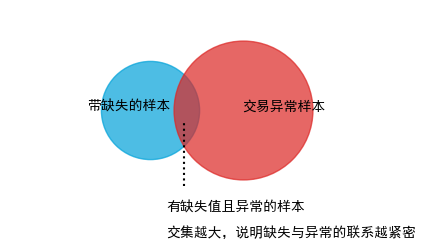

In [88]:
plt.rcParams['font.sans-serif']=['Simhei'] #让jupyter中的图画上的中文都显示出来
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(5,3), dpi=100)
plt.scatter(2.8,5,s=5000,c="#01a2d9",alpha=0.7,label="带缺失的样本")
plt.scatter(4,5,s=10000,c="#dc2624",alpha=0.7,label="交易异常样本")
plt.xlim(1,6)
plt.ylim(2.5,7)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.text(2,5,s="带缺失的样本",fontsize=10)
plt.text(4,5,s="交易异常样本",fontsize=10)
plt.vlines(3.25,3.5,4.8,colors="k",linestyles="dotted")
plt.text(3.015,3,s="有缺失值且异常的样本",fontsize=10)
plt.text(3.015,2.5,s="交集越大，说明缺失与异常的联系越紧密",fontsize=10)
plt.xticks([])
plt.yticks([])
plt.show()

- 检查交集/全部带缺失样本的比例
- 该比例很高则说明带缺失的样本基本都是交易异常，缺失本身与交易异常的联系很强

In [29]:
for i in ["商品一级类别","品牌"]:
    ratio1 = 100*data.loc[data[i].isnull(),"异常"].sum()/data[i].isnull().sum()
    print("缺少（{}）的样本中异常样本占比为{:.3f}%".format(i,ratio1))

缺少（商品一级类别）的样本中异常样本占比为11.727%
缺少（品牌）的样本中异常样本占比为20.984%


该数值说明，**商品并不会因为缺少品牌信息或缺少商品信息就被判断为交易异常**。缺失与交易异常的联系并不大。

- 检查交集/全部交易异常样本的比例
- 该比例很高则说明带缺失样本占据了很大的标签比例，不能轻易删除

In [30]:
for i in ["商品一级类别","品牌"]:
    ratio2 = 100*data.loc[data[i].isnull(),"异常"].sum()/(data["异常"]==1).sum()
    print("全部交易异常样本中，缺少（{}）的异常样本占比为{:.3f}%".format(i,ratio2))

全部交易异常样本中，缺少（商品一级类别）的异常样本占比为0.573%
全部交易异常样本中，缺少（品牌）的异常样本占比为0.569%


该数值说明，**全部交易异常样本中，缺失样本的占比非常小**，可以直接删除处理。

In [31]:
data.dropna(how="any",inplace=True)

In [32]:
data.info() #不再具有任何缺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132761 entries, 1 to 134189
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单ID    132761 non-null  int64  
 1   下单日期    132761 non-null  object 
 2   下单时间    132761 non-null  object 
 3   商品一级类别  132761 non-null  object 
 4   商品所属渠道  132761 non-null  object 
 5   商品ID    132761 non-null  int64  
 6   品牌      132761 non-null  object 
 7   订单金额    132761 non-null  float64
 8   商品销售数量  132761 non-null  int64  
 9   订单渠道    132761 non-null  object 
 10  支付方式    132761 non-null  object 
 11  下单用户ID  132761 non-null  object 
 12  城市      132761 non-null  object 
 13  异常      132761 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 15.2+ MB


删除样本后，需重新整理索引：

In [33]:
data.index = range(data.shape[0])

确认现在的样本数量与异常订单数量：

In [34]:
data.shape[0]

132761

In [35]:
(data["异常"] == 1).sum()

28284

### 3. 重复值处理：订单重复背后隐藏的问题

In [36]:
data["订单ID"].duplicated().sum()

18554

记得之前我们查看过“订单ID”，发现订单ID是有重复的，因此整个数据集中含有重复样本的可能性很高，并且样本很可能不是订单，而是订单中的一个商品、一次交易。我们来看看——

In [37]:
data.duplicated().sum() #只有8条重复样本，直接删除

8

In [38]:
data.drop_duplicates(inplace=True)

In [39]:
data.shape

(132753, 14)

现在来看，每个样本大概率是订单中的不同商品。

In [40]:
data["订单ID"].value_counts()

4279118253    32
4269390206    23
4271884108    20
4275856215    20
4265415474    19
              ..
4279111697     1
4280944658     1
4284934145     1
4283578388     1
4285530112     1
Name: 订单ID, Length: 114207, dtype: int64

随机选择一个重复订单，进行查看：

In [41]:
data[data["订单ID"] == 4279118253].head(10)

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
95213,4279118253,2013-07-23,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95214,4279118253,2013-11-08,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95215,4279118253,2013-01-26,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95216,4279118253,2013-02-03,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95217,4279118253,2013-07-06,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95218,4279118253,2013-04-28,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95219,4279118253,2013-10-04,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95220,4279118253,2013-02-21,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95221,4279118253,2013-06-18,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95222,4279118253,2013-09-25,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0


诡异的事情发生了，同一个订单ID下有相同的产品，并且全部是同一个用户、同一个地址在**不同日期的同一时间下单**的商品。同一订单下有相同的产品可以理解为购买了多件该产品、且每件都被记为了一个样本，但**一个用户在不同日期的同一时间下单，还形成了同样的订单ID，这明显是人为捏造的交易或数据有误。**通常来说，即便是设置好规律的自动下单（企业采购时可能会有如此情况），也不太可能实现交易时间在时分秒上完全一致，何况这些交易的金额非常小，完全不像企业订单。

In [42]:
data[data["订单ID"] == 4269390206].head(10)

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
76916,4269390206,2013-09-26,02:11:10,电视冰箱洗衣机空调,GO,1000324051,夏普,2588.0,1,主站,合并支付,1390109546,西安市,0
76917,4269390206,2013-03-09,02:11:10,电视冰箱洗衣机空调,POP,8002267703,夏普,14999.0,1,主站,合并支付,1390109546,西安市,0
76918,4269390206,2013-09-21,02:11:10,电视冰箱洗衣机空调,GO,1000324052,夏普,3888.0,1,主站,合并支付,1390109546,西安市,0
76919,4269390206,2013-01-23,02:11:10,家居日用,GO,1000174960,伟经,275.0,1,主站,合并支付,1390109546,西安市,0
76920,4269390206,2013-11-12,02:11:10,电脑办公打印文仪,GO,1000315933,中亿,738.0,1,主站,合并支付,1390109546,西安市,0
76921,4269390206,2013-05-03,02:11:10,生活电器厨卫电器,GO,1000320932,凯伍德,1690.0,1,主站,合并支付,1390109546,西安市,0
76922,4269390206,2013-05-02,02:11:10,家居日用,GO,1000336076,康宁,439.0,1,主站,合并支付,1390109546,西安市,0
76923,4269390206,2013-12-19,02:11:10,家居日用,GO,1000192284,国研联合,158.0,1,主站,合并支付,1390109546,西安市,0
76924,4269390206,2013-10-28,02:11:10,家居日用,GO,1000104751,苏泊尔,459.0,1,主站,合并支付,1390109546,西安市,0
76925,4269390206,2013-12-05,02:11:10,家居日用,GO,1000104746,苏泊尔,229.0,1,主站,合并支付,1390109546,西安市,0


查看另一个订单ID，也是相似的情况。我们基本可以判断，其中许多订单是人为加上日期再捏造的，**有人复制了订单或商品交易信息，再赋予不同的日期，对数据进行伪造**。这有可能是为了算法建模而做的数据增强，因此我们需要进一步查看，这些人造信息是否大量覆盖了交易异常的订单。

In [43]:
DupOrder = data["订单ID"].value_counts().index #找出重复订单的索引

In [44]:
#查看重复订单ID下，异常订单的情况
for i in DupOrder[:30]:
    AbOrder = (data.loc[data["订单ID"] == i,"异常"]==1).sum()
    print(i,":",AbOrder)

4279118253 : 0
4269390206 : 0
4271884108 : 20
4275856215 : 20
4265415474 : 0
4279551124 : 0
4283339603 : 0
4283339890 : 0
4283336310 : 0
4283873538 : 0
4283339774 : 0
4283874524 : 0
4283874688 : 0
4283874398 : 0
4283874209 : 0
4283873946 : 0
4276167340 : 0
4282513806 : 0
4282561933 : 0
4282842151 : 0
4193043860 : 16
4282512627 : 0
4282513764 : 0
4272509367 : 0
4282842230 : 0
4282842130 : 0
4282842193 : 0
4282842612 : 0
3826438122 : 0
4285070202 : 0


In [45]:
data[data["订单ID"] == 4271884108].head()

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
3980,4271884108,2013-04-30,09:41:31,服饰鞋帽,POP,8002089657,PPZ,178.0,2,手机站点,合并支付,gome_taozx,广州市,1
3981,4271884108,2013-10-09,09:41:31,服饰鞋帽,POP,8000345913,漫路,176.0,2,手机站点,合并支付,gome_taozx,广州市,1
15817,4271884108,2013-09-06,09:41:31,服饰鞋帽,POP,8002287340,jstfe,49.0,1,手机站点,合并支付,gome_taozx,广州市,1
15818,4271884108,2013-09-30,09:41:31,服饰鞋帽,POP,8002287341,jstfe,49.0,1,手机站点,合并支付,gome_taozx,广州市,1
15819,4271884108,2013-09-16,09:41:31,服饰鞋帽,POP,8002206973,梵利玛,109.0,1,手机站点,合并支付,gome_taozx,广州市,1


In [46]:
#一个订单ID下的产品ID有重复吗？
data.loc[data["订单ID"] == 4271884108,"商品ID"].duplicated().sum()

0

In [47]:
data[data["订单ID"] == 4193043860].head()

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
1118,4193043860,2013-06-23,22:50:54,生活电器厨卫电器,POP,8000325989,飞利浦,690.0,5,主站,合并支付,ye519888,惠州市,1
3794,4193043860,2013-07-19,22:50:54,生活电器厨卫电器,GO,1000365248,飞利浦,334.0,2,主站,合并支付,ye519888,惠州市,1
11939,4193043860,2013-01-05,22:50:54,手机摄影数码,GO,1000366925,华为,2288.0,1,主站,合并支付,ye519888,惠州市,1
11940,4193043860,2013-02-02,22:50:54,生活电器厨卫电器,GO,1000308290,奔腾,68.0,1,主站,合并支付,ye519888,惠州市,1
11941,4193043860,2013-08-27,22:50:54,生活电器厨卫电器,GO,1000310218,飞利浦,228.0,1,主站,合并支付,ye519888,惠州市,1


In [48]:
#再次，一个订单ID下的产品重复情况
data.loc[data["订单ID"] == 4193043860,"商品ID"].duplicated().sum()

0

我们可以发现：
- 同一订单ID下总是出现“不同日期同一时间”下单的情况，许多样本的“日期”特征很都是伪造的
- 对异常样本来说，订单下的商品ID都是不同的，并没有出现同一个订单下出现了相同商品的情况。这说明异常样本的下单时间虽然也是伪造的，但是样本本身并没有被伪造。

从建模角度来说，这种方式增加样本权重意义不大，因此**我们需要剔除“下单日期”这个特征后再进行去重**。同一订单下ID下，只要商品/价格有任意的区别，我们都可以认为样本是真实的交易，而不是人造的数据。如果去重之后，异常样本的数量没有变化，就说明异常样本中并没有人造样本。

去重之前的异常订单数量：

In [49]:
(data["异常"] == 1).sum()

28284

In [50]:
data2 = data.drop(columns="下单日期")

In [51]:
data2.duplicated().sum() #幸运的是这个数值很小，说明人造的数据并不太多

1471

In [52]:
#取出重复值的索引，按索引进行删除

In [53]:
data.drop(index=data[data2.duplicated()].index,inplace=True)

In [54]:
data["订单ID"].value_counts()

4269390206    23
4275856215    20
4271884108    20
4265415474    19
4283336310    18
              ..
4284571775     1
4284913792     1
4242454660     1
4178489477     1
4285530112     1
Name: 订单ID, Length: 114207, dtype: int64

In [55]:
#再提取其中一个订单ID进行查看，已经没有同一个订单下相同产品的情况了
data[data["订单ID"] == 4269390206].head()

,订单ID,下单日期,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
76916,4269390206,2013-09-26,02:11:10,电视冰箱洗衣机空调,GO,1000324051,夏普,2588.0,1,主站,合并支付,1390109546,西安市,0
76917,4269390206,2013-03-09,02:11:10,电视冰箱洗衣机空调,POP,8002267703,夏普,14999.0,1,主站,合并支付,1390109546,西安市,0
76918,4269390206,2013-09-21,02:11:10,电视冰箱洗衣机空调,GO,1000324052,夏普,3888.0,1,主站,合并支付,1390109546,西安市,0
76919,4269390206,2013-01-23,02:11:10,家居日用,GO,1000174960,伟经,275.0,1,主站,合并支付,1390109546,西安市,0
76920,4269390206,2013-11-12,02:11:10,电脑办公打印文仪,GO,1000315933,中亿,738.0,1,主站,合并支付,1390109546,西安市,0


删除样本后，需重新整理索引：

In [56]:
data.index = range(data.shape[0])

确认剩余的异常订单的数量：

In [57]:
(data["异常"] == 1).sum()

28284

这说明我们的推测是正确的，异常订单中并没有人造的部分。其他的“人造订单”很可能是放出该份数据的人员人为增加的。

另外，你是否发现了一个现象？
- **任意订单ID下，所有样本的标签是一致的**

In [58]:
#有异常的订单
data.loc[data["异常"]==1,"订单ID"].value_counts()

4275856215    20
4271884108    20
4193043860    16
4272902282    15
4263198458    14
              ..
4282488931     1
4261577594     1
3982046076     1
4276053188     1
4196075521     1
Name: 订单ID, Length: 25107, dtype: int64

In [59]:
data.loc[data["订单ID"] == 4263198458,"异常"]

1560     1
3931     1
3932     1
14800    1
14801    1
14802    1
14803    1
14804    1
14805    1
14806    1
14807    1
14808    1
14809    1
14810    1
Name: 异常, dtype: int64

In [60]:
#无异常的订单
data.loc[data["异常"]!=1,"订单ID"].value_counts()

4269390206    23
4265415474    19
4283874524    18
4283874209    18
4283339603    18
              ..
4216566879     1
4174660705     1
4032975971     1
4282231846     1
4123656192     1
Name: 订单ID, Length: 89105, dtype: int64

In [61]:
data.loc[data["订单ID"] == 4269390206,"异常"].sum()

0

我们可以在整个数据集上验证一下这一点。对每个含有交易异常样本的订单ID，我们计算该【ID下异常样本】占该【ID下全部样本的比例】。

In [62]:
label_1 = data.loc[data["异常"]==1,"订单ID"].value_counts()

In [63]:
###=====【TIME WARNING: 3mins】=====###
df = pd.DataFrame()
for idx,i in enumerate(label_1.index):
    ratio = label_1[i]/data[data["订单ID"] == i].shape[0]
    df.loc[idx,"订单ID"] = i
    df.loc[idx,"该ID下交易异常样本占所有样本的比例"] = ratio

In [64]:
df["该ID下交易异常样本占所有样本的比例"].value_counts()

1.0    25102
0.5        5
Name: 该ID下交易异常样本占所有样本的比例, dtype: int64

我们的观察几乎是正确的，这说明如果一个订单ID下的所有样本的标签几乎是一致的。在之后进行预测时我们可以利用这一点修正预测标签。

在之前的探索中，我们注意到下单日期这个特征很可能是被捏造的，在进行建模时，我们不能让不符合业务逻辑的被带入模型，因此我们必须修正该特征。现在的问题是：所有的下单日期都是人造的吗，还是只有相同订单ID下的不同日期是人造的？从业务和人心的角度来考虑，我认为**整个下单日期特征都是人造的**，主要是因为下单日期的分布过于均匀：

In [65]:
#先来看现在每个月的交易量分布
OrderMonth = data["下单日期"].apply(lambda x: x[5:7])
OrderMonth.value_counts()

10    11651
06    11201
09    11124
03    11113
07    11011
01    10959
04    10912
05    10888
12    10842
08    10837
11    10723
02    10021
Name: 下单日期, dtype: int64

通常来说，当一个订单被拆分成多比交易、且交易的日期各不相同时，**这个订单的实际下单日期很可能该订单ID下所有交易日期中最早的那个日期**。因为订单至少要在某一个日期实际发生，当人为在一个订单上制造日期时，通常不会倾向于去制造一个比实际交易日期还早的日期。

因此，在一部分订单日期是真实的、另一部分订单日期是人为制造的情况下，越往后的月份订单交易量会倾向于越多，而不会像现在看到的一样分布均匀。唯一的可能就是整个下单日期特征都是人造的，并且是故意制造成均匀分布在1-12月的状态。通常来说，异常与否都与交易时间没有太大的关联，现在我们还高度怀疑下单日期这个特征的数据可靠性，因此我们可以直接删除“下单日期”这个特征。

那如果我们还想要继续保留这个特征，要怎么办呢？我会建议取一个订单ID下所有样本的下单日期的中位数，来覆盖全部样本下的下单日期，这样可以保留原本在1-12月均匀的交易量分布。无论如何，如果要保留日期特征，则必须保证一个订单下所有样本的下单日期都一致。

In [66]:
data.drop(columns="下单日期",inplace=True)

### 4. 异常值：特征异常与交易异常有关吗？

- 先查看数据的分布与统计

对于大部分数，分布和统计能够帮助我们快速理解特征的部分情况，但现在的数据中有且只有交易金额、交易数量这两个连续型特征，且许多离散型特征的“分布”对当下的预测并无太大意义（如品牌、商品一级类别、城市），因此我们只对两个连续型特征做统计。

In [67]:
data.columns

Index(['订单ID', '下单时间', '商品一级类别', '商品所属渠道', '商品ID', '品牌', '订单金额', '商品销售数量',
       '订单渠道', '支付方式', '下单用户ID', '城市', '异常'],
      dtype='object')

In [68]:
data.loc[:,["订单金额","商品销售数量"]].describe()

,订单金额,商品销售数量
count,131282.000000,131282.000000
mean,667.187834,1.188975
std,2930.730828,1.684653
min,0.500000,1.000000
25%,29.000000,1.000000
50%,98.000000,1.000000
75%,379.000000,1.000000
max,766000.000000,200.000000


确认没有小于0的业务上不该出现的异常值，从分布来看两个连续型变量都可能出现大量的异常。

In [69]:
#使用seaborn绘制分布图

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from c

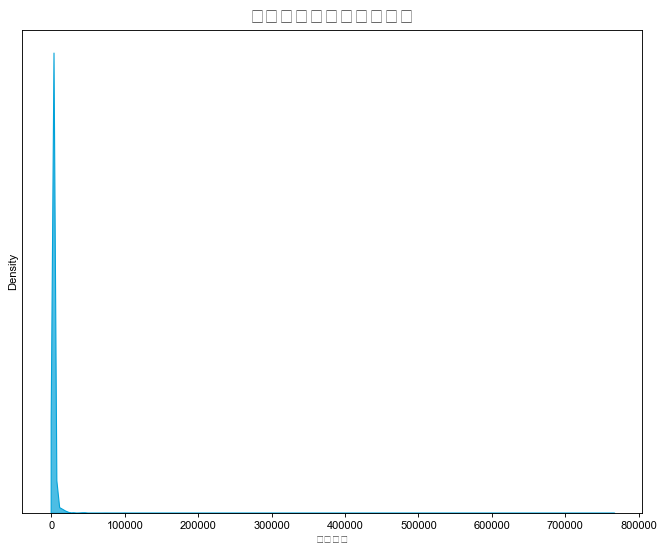

In [70]:
import seaborn as sns
plt.rcParams['font.sans-serif']=['Simhei'] #让jupyter中的图画上的中文都显示出来
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10, 8), dpi=80)
#绘图
sns.kdeplot(data.loc[:, "订单金额"],
            shade=True,
            color="#01a2d9",
            label="订单金额",
            alpha=.7)
#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("订单金额概率密度分布图",fontsize=18)
plt.yticks([])
#plt.xlim((-10000,100000))
#plt.xlim((-1,10000))
plt.show()

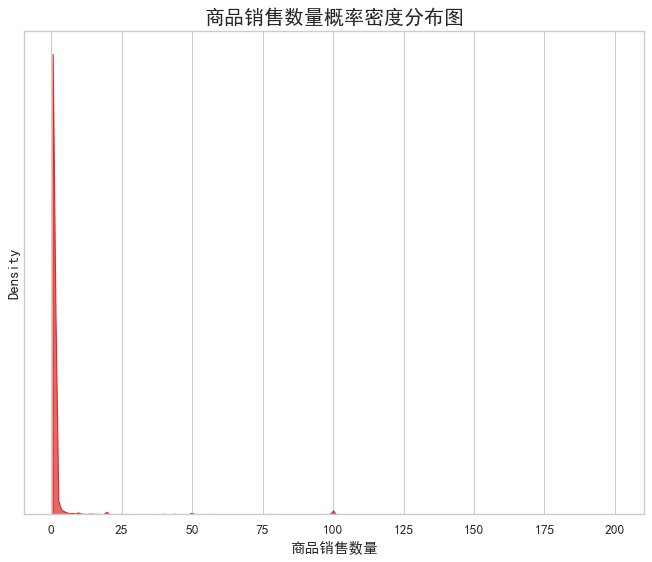

In [71]:
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(data.loc[:, "商品销售数量"],
            shade=True,
            color="#dc2624",
            label="商品销售数量",
            alpha=.7)
#风格与装饰
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("商品销售数量概率密度分布图",fontsize=18)
plt.yticks([])
#plt.xlim((-1,20))
#plt.xlim((-1,5))
plt.show()

- 检测异常值：箱线图的法则
> **当任意样本的特定特征值超出 [QL-1.5\*IQR, QU+1.5*IQR]时，则认为该样本的该特征值是异常值**<br>
> QL:下四分位数，QU：上四分位数，IQR：QU-QL<br>

**为避免混淆，特征中存在异常值统称为“特征异常”，标签上标注为异常则成为“交易异常”**。以极度左偏的数据来看，特征异常的基本情况就是：一次性下单太多商品，或一次性支付太贵的金额，但这两点在电商实际业务中都是可能实现的。

In [72]:
#进行异常值检测，并保存特征异常的样本的索引
NumOfSamples = data.shape[0]
DataNoAbnormal = data.copy()
BoxAbnormalIdx = [] #列表：用于保存特征异常的样本的索引
for idx,column in enumerate(["订单金额","商品销售数量"]):
    feature = data.loc[:,column]
    QL = np.quantile(feature,0.25)
    QU = np.quantile(feature,0.75)
    IQR = QU - QL
    #过小或过大的都属于异常值
    error = feature[((feature < (QL - 1.5*IQR)).astype(int) + (feature > (QU + 1.5*IQR)).astype(int)) != 0]
    BoxAbnormalIdx.extend(error.index)

In [73]:
len(BoxAbnormalIdx)

31266

In [74]:
BoxAbnormalIdx = set(BoxAbnormalIdx) #利用集合对筛选出的样本索引进行去重

In [75]:
len(BoxAbnormalIdx) #没有太多重复，这说明大部分样本只有一个特征存在异常

29949

In [76]:
len(BoxAbnormalIdx)/data.shape[0] #占总体样本的比例太高，无法直接删除

0.22812723754970216

In [77]:
#特征异常的样本中，有多少被标记为交易异常？
(data.loc[BoxAbnormalIdx,"异常"] == 1).sum()

7368

考虑到所有交易异常加起来才接近3w，7000+其实是一个较大的数字，超过整体的1/4，因此特征异常样本不能直接删除，但特征的异常与交易的异常应该并无太直接的关系。我们可以按“是否有特征异常”构成新的特征，计算该特征与标签之间的相关性。

In [78]:
df = pd.DataFrame(index=data.index)

In [79]:
df["特征异常"] = 0

In [80]:
df.loc[BoxAbnormalIdx,"特征异常"] = 1

In [81]:
pd.concat([df["特征异常"],data["异常"]],axis=1).corr()

,特征异常,异常
特征异常,1.000000,0.040428
异常,0.040428,1.000000


看起来特征异常与实际交易异常之间几乎不存在任何关系，我们可以不使用这个特征。从电商业务角度来看，异常基本出现在用户支付大量金额、或一次性购入大量物品的时候，这些情况在电商交易流程中比较普遍，因此我们先不处理异常值，建模看看结果如何。

In [82]:
data.head()

,订单ID,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,订单金额,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常
0,4283851335,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
1,4276537082,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
2,4281111595,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1
3,3977175284,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,0
4,4106833871,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131277,4285755067,23:56:01,电视冰箱洗衣机空调,GO,1000296106,博世,2765.0,1,主站,货到付款,yanshuo3,北京市,0
131278,4285755076,23:57:24,电视冰箱洗衣机空调,GO,1000296108,西门子,2672.0,1,主站,货到付款,yanshuo3,北京市,0
131279,4285765029,23:54:34,家具建材,GO,1000348294,埃斯兰德,128.0,1,抢购,合并支付,1350304234,广州市,0
131280,4285770012,23:55:06,家居日用,GO,1000335947,炊大师,79.0,1,抢购,合并支付,shukun,东莞市,0


In [83]:
data.to_csv(r'H:\精品课\sklearn实战案例\数据\电商异常检测\abnormal_order2.csv')